In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import PMTPosition as PMT

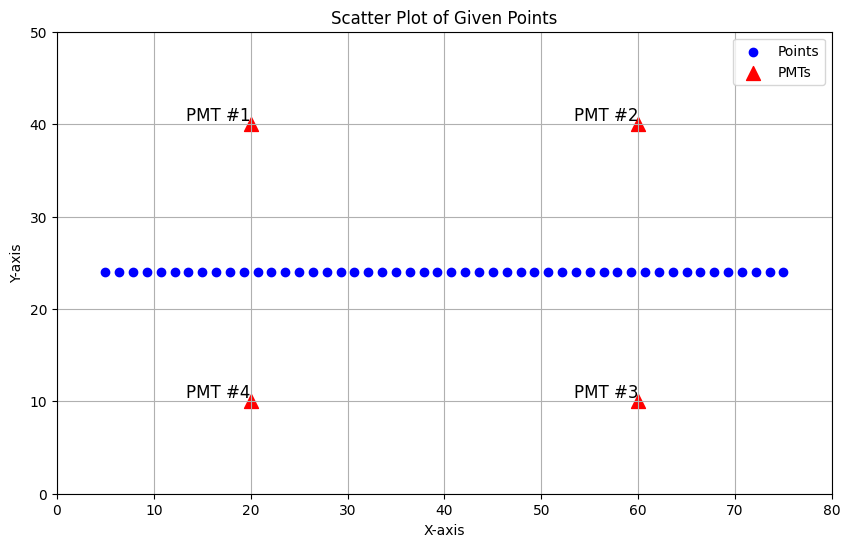

In [40]:
GEM_width,  GEM_height = PMT.GetGEMsDim()
GEM_z_dist = PMT.GetGEMsZ()
print(GEM_width,  GEM_height, GEM_z_dist)

pos = PMT.GenEventPosition(x_offset = 0.0, size = 50, distribution = 'fixedY', x_start = 5, x_end = 75,  y_offset = 24)

####  Plotting the points created
PMT_pos = np.array([[20, 40], [60, 40], [60,10], [20,10]])

plt.figure(figsize=(10, 6))
plt.scatter(pos[:, 0], pos[:, 1], color='blue', label='Points')
plt.scatter(PMT_pos[:, 0], PMT_pos[:, 1], color='red', label='PMTs', marker='^', s=100)

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(0,GEM_width)
plt.ylim(0,GEM_height)
plt.title('Scatter Plot of Given Points')
plt.legend()
plt.grid(True)

for i in range(4):
    plt.text(PMT_pos[i, 0], PMT_pos[i, 1], "PMT #{}".format(i+1), fontsize=12, ha='right', va='bottom')

plt.show()

In [6]:
R = PMT.GetR(PMT_pos = np.array([25.0, 40.0]), Event_pos = pos)

In [7]:
print(R)

[64.07807737 59.21148537 60.87692502 68.60029154 80.65977932]


In [24]:
PMT_pos = np.array([[20, 40], [60, 40], [60,10], [20,10]])
n_PMTS = len(PMT_pos)
R_all   = PMT.GetR_All(PMT_pos = PMT_pos, Event_pos = pos)

In [9]:
print(R_all)

[[62.29767251 84.14867795 89.33644273 69.14477565]
 [59.         71.28113355 77.3369252  66.18912297]
 [62.29767251 62.29767251 69.14477565 69.14477565]
 [71.28113355 59.         66.18912297 77.3369252 ]
 [84.14867795 62.29767251 69.14477565 89.33644273]]


In [17]:
ints = PMT.GetIntegrals(R_all, energy = 5.9, LY = 8500.0)


In [11]:
print(ints)

[[1.70471279e-04 5.12093562e-05 4.03110289e-05 1.12331360e-04]
 [2.11899757e-04 9.94580900e-05 7.17779251e-05 1.33780249e-04]
 [1.70471279e-04 1.70471279e-04 1.12331360e-04 1.12331360e-04]
 [9.94580900e-05 2.11899757e-04 1.33780249e-04 7.17779251e-05]
 [5.12093562e-05 1.70471279e-04 1.12331360e-04 4.03110289e-05]]


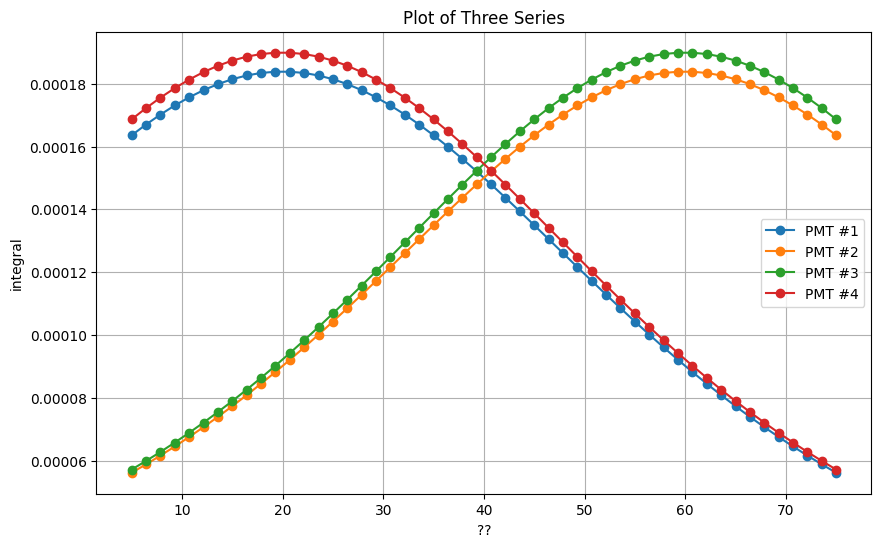

In [41]:
# PMT_pos = np.array([[20, 40], [60, 40], [60,10], [20,10]])
n_PMTS = len(PMT_pos)
R_all   = PMT.GetR_All(PMT_pos = PMT_pos, Event_pos = pos)

ints = PMT.GetIntegrals(R_all, energy = 5.9, LY = 8500.0)

series_data = []

for i in range(n_PMTS):

    n_series = ints[:,i]
    series_data.append(n_series)

x_values = pos[:,0]

plt.figure(figsize=(10, 6))
for pmt_i in range(len(series_data)):
    plt.plot(x_values, series_data[pmt_i], marker='o', label='PMT #{}'.format(pmt_i+1))

# Adding labels, title, and legend
plt.xlabel('??')
plt.ylabel('integral')
plt.title('Plot of Three Series')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [43]:
def create_bat_input(run=10000, event=9, trigger=0, slice_ints=[]):
    """
    Creates a file for BAT input containing waveform slice integrals.
    
    Parameters:
    - run: The run number.
    - event: The event number.
    - trigger: The trigger number.
    - slice_ints: A list of lists where each sublist contains waveform slice integrals for PMTs.
                  Each sublist corresponds to a PMT (e.g., PMT 1, PMT 2, etc.).
                  Each element in the sublist corresponds to a slice index.
    """
    # Conversion factor from ADU to nC
    vtg_to_nC = (1. / 4096.) * (4. / 3.) * (1. / 50.)

    with open("output_for_bat.txt", "w") as outFile:
        for slice_i in range(len(slice_ints[0])):
            outFile.write(f"{run}\t{event}\t{trigger}\t{slice_i}")
            
            for pmt_i in range(len(slice_ints)):
                outFile.write(f"\t{slice_ints[pmt_i][slice_i] * vtg_to_nC}")
            
            outFile.write("\n")

In [46]:
## Create input for BAT
## Run it to see how the positions are discovered (btw, should be perfect match)

## decide how to evaluate best positions

## consider "minimum triggerable" (this is why the correct amplitudes were considered)
## can even to a plot of "non-trigerable event positions" in the X-Y map





create_bat_input()

IndexError: list index out of range